<a href="https://colab.research.google.com/github/sparsh-tekriwal/Image-Recognition-Dogs-vs-Cats/blob/master/Image%20Classification%20using%20PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading and processing pet images 

In [2]:
# !wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip -P 'drive/My Drive/PetImages'

In [3]:
# !unzip 'drive/My Drive/PetImages/kagglecatsanddogs_3367a.zip' -d 'drive/My Drive/'

In [12]:
# !cp /content/training_data.npy 'drive/My Drive/PetImages'

In [4]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [5]:
REBUILD_DATA = True

In [ ]:
class DogsVSCats():
  IMG_SIZE = 50
  CATS = "PetImages/Cat"
  DOGS = "PetImages/Dog"
  LABELS = {CATS: 0, DOGS: 1}
  training_data = []
  catcount = 0
  dogcount = 0

  def make_training_data(self):
    # Iterating through Cats and Dogs directories
    for label in self.LABELS:
      print(label)
      # Iterating through contents of each directory along with a progress bar
      for f in tqdm(os.listdir(label)):
        try:
          # joining file name to path
          path = os.path.join(label, f)
          #reading image file and converting to grayscale as my hypothesis is color doesn't matter while differenciating between cats and dogs. 
          # And we gotta simplify for efficient NN computation
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          # I have defined this parmater for the class
          img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
          # converting labels to a one hot format
          self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

          # Counting number of data points in each class
          if label == self.CATS:
            self.catcount +=1
          elif label == self.DOGS:
            self.dogcount +=1
        
        except Exception as e:
          print("We have an issue with this dog/cat image: " + str(e))
    # Shuffling the ingested data so that they are evenly distributed
    # No reassignment requiremnt for this numpy function
    np.random.shuffle(self.training_data)
    # Saving data so that I don't need to import it do this computation again
    np.save("training_data.npy", self.training_data)
    print("Cats: ", self.catcount)
    print("Dogs: ", self.dogcount)

if REBUILD_DATA:
  dogvcats = DogsVSCats()
  dogvcats.make_training_data()

In [17]:
training_data = np.load("training_data.npy", allow_pickle = True)

In [26]:
print("The number of images in my dataset is: "+ str(len(training_data)))

The number of images in my dataset is: 24946


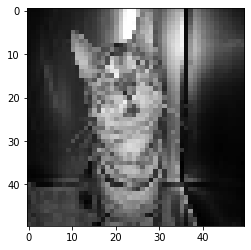

In [22]:
import matplotlib.pyplot as plt
plt.imshow(training_data[1][0], cmap="gray")
plt.show()

# Training a Convolutional Neural Network 

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [39]:
class Net(nn.Module):
  def __init__(self):
    super().__init__() # run the init of parent class (nn.Module)
    self.conv1 = nn.Conv2d(1, 32, 5) # input is 1, output is 32 conv features, and 5 x 5 is the kernel or window size
    self.conv2 = nn.Conv2d(32, 64, 5)
    self.conv3 = nn.Conv2d(64, 128, 5)

    x = torch.randn(50,50).view(-1,1,50,50)
    self._to_linear = None
    self.convs(x)
    
    self.fc1 = nn.Linear(self._to_linear, 512)
    self.fc2 = nn.Linear(512 , 2)

  def convs(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))

    if self._to_linear is None:
      self._to_linear = x[0].shape[0] * x[0].shape[1] * x[0].shape[2]
    return x
    b
  def forward(self, x):
    x = self.convs(x)
    x = x.view(-1, self._to_linear)
    x = F.relu(self.fc1(x))
    x = slef.fc2(x)
    return F.softmax(x, dim=1)

net = Net()

In [41]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1, 50, 50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X) * VAL_PCT)
print(val_size)

2494
